In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("/content/mnist_train.csv")
input_set=np.array(df.iloc[:,1:])
labels=np.array(df.iloc[:,0])
labels=labels.reshape(60000,1)

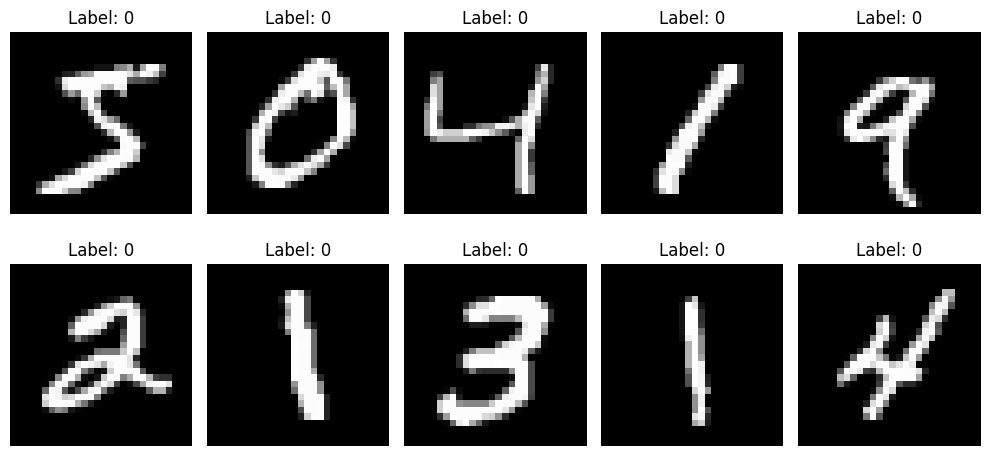

In [ ]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(input_set[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(labels[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
class ann:
  def __init__(self):
    np.random.seed(42)
    self.weights = np.random.rand(784,1)
    self.bias = np.random.rand(1)
    self.lr = 0.05 #learning rate
  def sigmoid(self,x):
    return 1/(1+np.exp(-x))
  def sigmoid_derivative(self,x):
    return self.sigmoid(x)*(1-self.sigmoid(x))
  def train(self,input_set,labels):
    for epoch in range(10):
      inputs= input_set
      XW = np.dot(inputs,self.weights)+self.bias
      z = self.sigmoid(XW)
      error = z - labels
      dcost = error
      dpred = self.sigmoid_derivative(z)
      z_del = dcost * dpred
      inputs = input_set.T
      self.weights = self.weights - self.lr*np.dot(inputs, z_del)

      for num in z_del:
        self.bias = self.bias - self.lr*num


In [ ]:
model=ann()
model.train(input_set,labels)

In [ ]:
df2=pd.read_csv("/content/mnist_test.csv")
single_pt = np.array(df2.iloc[0,1:])
result = model.sigmoid(np.dot(single_pt, model.weights) + model.bias)
print(result)

[1.]


In [ ]:
single_pt = np.array(df2.iloc[1,1:])
result = model.sigmoid(np.dot(single_pt, model.weights) + model.bias)
print(result)

[1.]


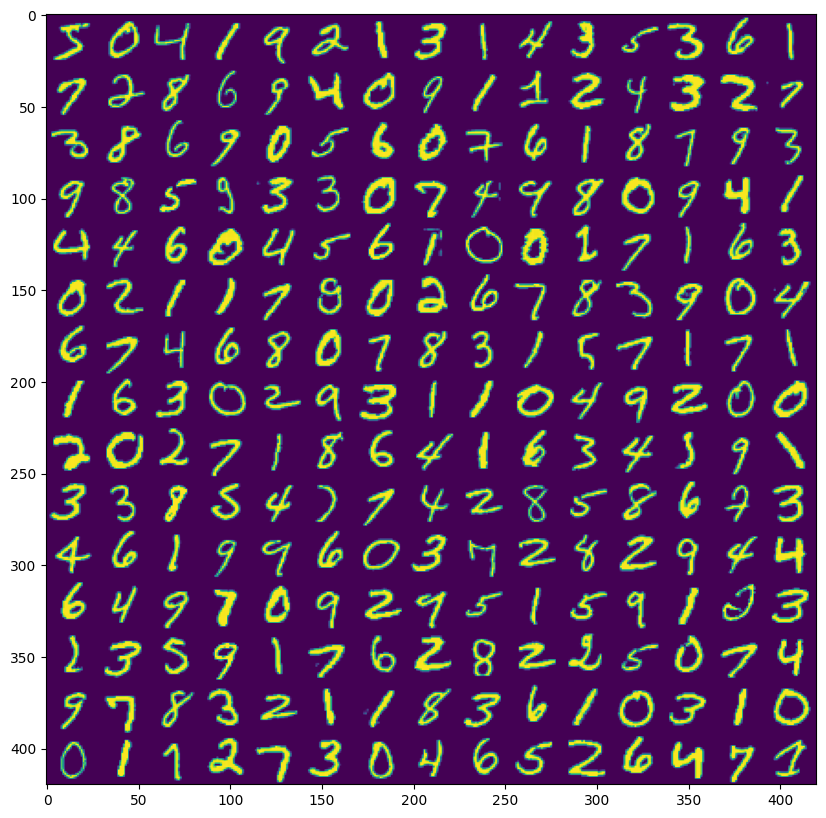

225


In [ ]:
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)
k=0
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])

        digit = input_set[k].reshape(digit_size, digit_size)
        k = k +1
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()
print (k)